In [1]:
# %pip install pydicom

     |████████████████████████████████| 2.0 MB 5.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pydicom
import CTimageLIB

In [3]:
# The main entrance of programme
if __name__ == "__main__":
    dataPath = "./dataset/brain/DICOM/IM_0002"
    dataset = CTimageLIB.readCT(dataPath=dataPath)

In [4]:
# Output the attributes of dicom
for attr in dataset:
    print(attr.name, "=", attr.value)

Specific Character Set = ISO_IR 100
Image Type = ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
Instance Creation Date = 20090203
Instance Creation Time = 135827
Instance Creator UID = 1.3.46.670589.11.8882.5
SOP Class UID = 1.2.840.10008.5.1.4.1.1.4
SOP Instance UID = 1.3.46.670589.11.0.0.11.4.2.0.8882.5.3680.2009020212363576412
Study Date = 20090202
Series Date = 20090202
Acquisition Date = 20090202
Content Date = 20090202
Study Time = 123306
Series Time = 123605.32000
Acquisition Time = 123605.32
Content Time = 123605.32
Accession Number = 
Modality = MR
Manufacturer = Philips Medical Systems
Institution Name = Welcome CRF
Referring Physician's Name = 
Station Name = MEDNT
Study Description = MRC44
Series Description = Survey_MST
Operators' Name = 
Admitting Diagnoses Description = 
Manufacturer's Model Name = Intera
Referenced Performed Procedure Step Sequence = [(0008, 0005) Specific Character Set              CS: ''
(0008, 0012) Instance Creation Date              DA: '20090203'
(0

/Users/jiewang/opt/anaconda3/envs/dataEngineering/lib/python3.6/site-packages/pydicom/valuerep.py:290: UserWarning: The value length (65) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


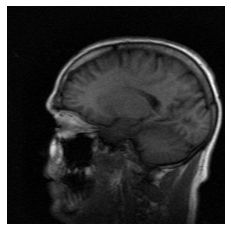

In [5]:
# Show the single image of CT dataset

# Check the avaliability of CT data
if 'PixelData' not in dataset:
    raise ValueError("DICOM file does not contain pixel data.")

# Acquire pixel data
pixels = dataset.pixel_array

# Show the image
plt.imshow(pixels, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

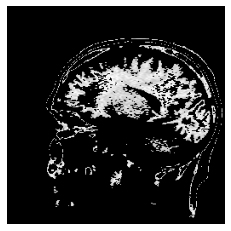

In [6]:
# Do the segmentation to extract the brain part
# Threshold segmentation
minThreshold = 150
maxThreshold = 200
brainImage = CTimageLIB.thresholdSegmentation(pixels=pixels,minThreshold=minThreshold,maxThreshold=maxThreshold)
plt.imshow(brainImage, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Edge detection method